<a href="https://colab.research.google.com/github/Nithesh-b/Twitter_Sentiment/blob/post-viva/Step2_PreProcessing_Continued_Group33_Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project Domain #11 ( Sentiment Analysis in Twitter )

Tweet text along with other features has been extracted from different from different sources (domain) using APIs.
Each row of the dataset contains sentiment code (negative, positive and neutral embedded in Twit-id column. The task is to predict whether a tweet contains positive, negative, or neutral sentiment. This is a supervised learning task where given a text string.

## Step 2 - Pre Processing

#### In this file all the Pre-Processing Steps will be performed.
### Flow :- 

1. Read the Output file of Step 1 as the Input for Step 2
2. Check for missing values
3. Check class distribution
4. Remove user handles starting with @
5. Remove special characters
6. Remove numbers
7. Remove URLs
8. Remove Single Characters
9. Tokenizing and Storing in another column
10. Removing Stop words
11. Expanding words in short form
12. Perform Stemming
13. Perform Lemmatization
14. Dropping other columns
15. Rearranging the columns
16. Visualization - Tweet Patters using Word Cloud
17. Saving Output of Step 2 Pre-Processing.

### Input File - Step1_PreProcessing_Group33_Cleaned_Tweets.csv
### Output File - Step2_PreProcessing_Group33_Cleaned_Tweets.csv

In [105]:
# Library Imports

import numpy as np 
print('numpy: {}'.format(np.__version__))

import pandas as pd
print('pandas: {}'.format(pd.__version__))

import re
print('re: {}'.format(re.__version__))

import nltk
print('nltk: {}'.format(nltk.__version__))

import matplotlib.pyplot as plt

%matplotlib inline

numpy: 1.18.5
pandas: 1.1.3
re: 2.2.1
nltk: 3.2.5


In [106]:
# Getting the Stop Words and Other Text Processing Libraries
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from termcolor import colored
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Data Input / Output - Folders where the input data will be read and output will be stored.

In [107]:
InputdataFolder = "/content/sample_data/"
OutputFolder = "/content/sample_data/outputs"
MLOutfolder =  "/content/sample_data/outputs"

In [108]:
# Reading the First Round PreProcessed Data
# Data read - All Required data  are in datafolder
cleaned_tweets_df = pd.read_csv(OutputFolder+"/Step1_PreProcessing_Group33_Cleaned_Tweets.csv")
print(cleaned_tweets_df.shape)

(30155, 10)


In [109]:
# Function to find the missing values in each column

def find_missing_values_func(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [110]:
# Invoking the find_missing_values_func() with data frame of original tweets

columnsWiseMissingValue = find_missing_values_func(cleaned_tweets_df) 
print(columnsWiseMissingValue)

Selected dataframe has 10 columns.
There are 0 columns that have missing values.
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []


In [111]:
#Class Distribution
# Check label_id 
cleaned_tweets_df["class"].value_counts()

1    12259
0     9983
2     7913
Name: class, dtype: int64

# Processing tweet text data

## 1. Removing User handles starting with @

In [112]:
cleaned_tweets_df['Tweet'].replace(regex=True,inplace=True,to_replace='@[\w]*',value='')

In [113]:
cleaned_tweets_df['Tweet']

0                               Just landed. My ears hurt 
1        ouch following the #ASOT400 in TweetDeck excee...
2         i really wanna see it! but no one would go wi...
3         Ahh, this is how you reply!! I had all these ...
4              awwww. and i didn't get to be the hero.... 
                               ...                        
30150    is not the new  is more like the new . Love AA...
30151                    you're killing me from the inside
30152    just hung up on me again. Another waste of an ...
30153    and when will one of these agents be available...
30154    is there a better time to call? My flight is o...
Name: Tweet, Length: 30155, dtype: object

## 2. Removing Special Characters

In [114]:
# Removing special characters
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]

In [115]:
for char in spec_chars:
    cleaned_tweets_df['Tweet'] = cleaned_tweets_df['Tweet'].str.replace(char, '')

In [116]:
cleaned_tweets_df['Tweet']

0                                Just landed My ears hurt 
1        ouch following the ASOT400 in TweetDeck exceed...
2         i really wanna see it but no one would go wit...
3         Ahh this is how you reply I had all these ran...
4                    awwww and i didnt get to be the hero 
                               ...                        
30150    is not the new  is more like the new  Love AA ...
30151                     youre killing me from the inside
30152    just hung up on me again Another waste of an h...
30153    and when will one of these agents be available...
30154    is there a better time to call My flight is on...
Name: Tweet, Length: 30155, dtype: object

## 3. Removing Numbers

In [117]:
# Removing numbers
cleaned_tweets_df['Tweet'] = cleaned_tweets_df['Tweet'].str.replace('\d+', '')

In [118]:
cleaned_tweets_df['Tweet']

0                                Just landed My ears hurt 
1        ouch following the ASOT in TweetDeck exceeded ...
2         i really wanna see it but no one would go wit...
3         Ahh this is how you reply I had all these ran...
4                    awwww and i didnt get to be the hero 
                               ...                        
30150    is not the new  is more like the new  Love AA ...
30151                     youre killing me from the inside
30152    just hung up on me again Another waste of an h...
30153    and when will one of these agents be available...
30154    is there a better time to call My flight is on...
Name: Tweet, Length: 30155, dtype: object

## 4. Removing URLs

In [119]:
# Removing URLs
cleaned_tweets_df['Tweet'] = cleaned_tweets_df['Tweet'].str.replace('(www\.[^\s]+)|(https?://[^\s]+)', '')

In [120]:
cleaned_tweets_df['Tweet']

0                                Just landed My ears hurt 
1        ouch following the ASOT in TweetDeck exceeded ...
2         i really wanna see it but no one would go wit...
3         Ahh this is how you reply I had all these ran...
4                    awwww and i didnt get to be the hero 
                               ...                        
30150    is not the new  is more like the new  Love AA ...
30151                     youre killing me from the inside
30152    just hung up on me again Another waste of an h...
30153    and when will one of these agents be available...
30154    is there a better time to call My flight is on...
Name: Tweet, Length: 30155, dtype: object

## 5. Removing Single Characters

In [121]:
# Removing Single Characters
pattern = r"((?<=^)|(?<= )).((?=$)|(?= ))"
cleaned_tweets_df['Tweet'] = cleaned_tweets_df['Tweet'].str.replace(pattern, '')

In [122]:
cleaned_tweets_df['Tweet']

0                                Just landed My ears hurt 
1        ouch following the ASOT in TweetDeck exceeded ...
2          really wanna see it but no one would go with...
3         Ahh this is how you reply  had all these rand...
4                     awwww and  didnt get to be the hero 
                               ...                        
30150    is not the new  is more like the new  Love AA ...
30151                     youre killing me from the inside
30152    just hung up on me again Another waste of an h...
30153    and when will one of these agents be available...
30154    is there  better time to call My flight is on ...
Name: Tweet, Length: 30155, dtype: object

## 6. Tokenizing and Storing in another column

In [123]:
cleaned_tweets_df['TokenizedTweets'] = cleaned_tweets_df['Tweet'].str.split()

In [124]:
cleaned_tweets_df['TokenizedTweets']

0                           [Just, landed, My, ears, hurt]
1        [ouch, following, the, ASOT, in, TweetDeck, ex...
2        [really, wanna, see, it, but, no, one, would, ...
3        [Ahh, this, is, how, you, reply, had, all, the...
4              [awwww, and, didnt, get, to, be, the, hero]
                               ...                        
30150    [is, not, the, new, is, more, like, the, new, ...
30151              [youre, killing, me, from, the, inside]
30152    [just, hung, up, on, me, again, Another, waste...
30153    [and, when, will, one, of, these, agents, be, ...
30154    [is, there, better, time, to, call, My, flight...
Name: TokenizedTweets, Length: 30155, dtype: object

## 7. Removing Stop Words

In [125]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [126]:
cleaned_tweets_df["Tweets_Without_Stop_Words"] = cleaned_tweets_df['Tweet'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop))

In [127]:
cleaned_tweets_df["Tweets_Without_Stop_Words"]

0                                 just landed my ears hurt
1        ouch following asot tweetdeck exceeded tweet l...
2                      really wanna see one would go lmfao
3             ahh reply random followers dont how sad haha
4                                     awwww didnt get hero
                               ...                        
30150    new like new love aa not impressed subpar plan...
30151                                 youre killing inside
30152    hung another waste hour time how supposed book...
30153                           one agents available speak
30154    better time call my flight friday need change ...
Name: Tweets_Without_Stop_Words, Length: 30155, dtype: object

## 8. Expanding Words

In [128]:
!pip install contractions

In [129]:
import contractions
cleaned_tweets_df['ExpandedTweets'] = cleaned_tweets_df['Tweets_Without_Stop_Words'].apply(lambda words: contractions.fix(words)) 

In [130]:
cleaned_tweets_df['ExpandedTweets']

0                                 just landed my ears hurt
1        ouch following asot tweetdeck exceeded tweet l...
2                    really want to see one would go lmfao
3           ahh reply random followers do not how sad haha
4                                   awwww did not get hero
                               ...                        
30150    new like new love aa not impressed subpar plan...
30151                               you are killing inside
30152    hung another waste hour time how supposed book...
30153                           one agents available speak
30154    better time call my flight friday need change ...
Name: ExpandedTweets, Length: 30155, dtype: object

## 9. Stemming

In [131]:
# Stemming
# importing modules 
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

ps = PorterStemmer()
cleaned_tweets_df['TokenizeTweet'] = cleaned_tweets_df['ExpandedTweets'].apply(lambda words: 
                                                               word_tokenize(words))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [132]:
cleaned_tweets_df['TokenizeTweet']

0                           [just, landed, my, ears, hurt]
1        [ouch, following, asot, tweetdeck, exceeded, t...
2           [really, want, to, see, one, would, go, lmfao]
3        [ahh, reply, random, followers, do, not, how, ...
4                             [awwww, did, not, get, hero]
                               ...                        
30150    [new, like, new, love, aa, not, impressed, sub...
30151                          [you, are, killing, inside]
30152    [hung, another, waste, hour, time, how, suppos...
30153                      [one, agents, available, speak]
30154    [better, time, call, my, flight, friday, need,...
Name: TokenizeTweet, Length: 30155, dtype: object

In [133]:
cleaned_tweets_df['Tweet_stemmed']=cleaned_tweets_df['TokenizeTweet'].apply(lambda x : [ps.stem(y) for y in x])

In [134]:
cleaned_tweets_df['Tweet_stemmed']

0                              [just, land, my, ear, hurt]
1        [ouch, follow, asot, tweetdeck, exceed, tweet,...
2           [realli, want, to, see, one, would, go, lmfao]
3        [ahh, repli, random, follow, do, not, how, sad...
4                             [awwww, did, not, get, hero]
                               ...                        
30150    [new, like, new, love, aa, not, impress, subpa...
30151                              [you, are, kill, insid]
30152    [hung, anoth, wast, hour, time, how, suppos, b...
30153                           [one, agent, avail, speak]
30154    [better, time, call, my, flight, friday, need,...
Name: Tweet_stemmed, Length: 30155, dtype: object

## 10. Lemmatizing

In [135]:
from nltk.stem import WordNetLemmatizer
wl = WordNetLemmatizer()

In [136]:
cleaned_tweets_df['Tweet_Lemmatized']=cleaned_tweets_df['Tweet_stemmed'].apply(lambda x : [wl.lemmatize(y) for y in x])

In [137]:
cleaned_tweets_df['Tweet_Lemmatized']

0                              [just, land, my, ear, hurt]
1        [ouch, follow, asot, tweetdeck, exceed, tweet,...
2           [realli, want, to, see, one, would, go, lmfao]
3        [ahh, repli, random, follow, do, not, how, sad...
4                             [awwww, did, not, get, hero]
                               ...                        
30150    [new, like, new, love, aa, not, impress, subpa...
30151                              [you, are, kill, insid]
30152    [hung, anoth, wast, hour, time, how, suppos, b...
30153                           [one, agent, avail, speak]
30154    [better, time, call, my, flight, friday, need,...
Name: Tweet_Lemmatized, Length: 30155, dtype: object

In [138]:
cleaned_tweets_df['Tweets_Joined']=cleaned_tweets_df['Tweet_Lemmatized'].apply(lambda x : ' '.join(x))

In [139]:
cleaned_tweets_df['Tweets_Joined']

0                                    just land my ear hurt
1            ouch follow asot tweetdeck exceed tweet limit
2                    realli want to see one would go lmfao
3              ahh repli random follow do not how sad haha
4                                   awwww did not get hero
                               ...                        
30150    new like new love aa not impress subpar plane ...
30151                                   you are kill insid
30152    hung anoth wast hour time how suppos book one ...
30153                                one agent avail speak
30154    better time call my flight friday need chang w...
Name: Tweets_Joined, Length: 30155, dtype: object

In [140]:
cleaned_tweets_df['Clean_tweet'] = cleaned_tweets_df['Tweets_Joined']

In [141]:
cleaned_tweets_df['Clean_tweet']

0                                    just land my ear hurt
1            ouch follow asot tweetdeck exceed tweet limit
2                    realli want to see one would go lmfao
3              ahh repli random follow do not how sad haha
4                                   awwww did not get hero
                               ...                        
30150    new like new love aa not impress subpar plane ...
30151                                   you are kill insid
30152    hung anoth wast hour time how suppos book one ...
30153                                one agent avail speak
30154    better time call my flight friday need chang w...
Name: Clean_tweet, Length: 30155, dtype: object

In [142]:
cleaned_tweets_df.columns

Index(['tweet_id', 'SourceDataBase', 'OS', 'Tweet-Class_category-Code',
       'Tweet_source', 'Tweeted-By', 'retweet_count', 'Tweet', 'Country',
       'class', 'TokenizedTweets', 'Tweets_Without_Stop_Words',
       'ExpandedTweets', 'TokenizeTweet', 'Tweet_stemmed', 'Tweet_Lemmatized',
       'Tweets_Joined', 'Clean_tweet'],
      dtype='object')

## 11. Dropping Other Columns

In [143]:
cleaned_tweets_df = cleaned_tweets_df.drop(['TokenizedTweets', 'Tweets_Without_Stop_Words', 'ExpandedTweets', 'TokenizeTweet', 'Tweet_stemmed', 'Tweet_Lemmatized', 'Tweets_Joined'], axis = 1)

In [144]:
cleaned_tweets_df.columns

Index(['tweet_id', 'SourceDataBase', 'OS', 'Tweet-Class_category-Code',
       'Tweet_source', 'Tweeted-By', 'retweet_count', 'Tweet', 'Country',
       'class', 'Clean_tweet'],
      dtype='object')

In [145]:
#Check missing_values distribution 
columnsWiseMissingValue = find_missing_values_func(cleaned_tweets_df) 
print(columnsWiseMissingValue)

Selected dataframe has 11 columns.
There are 0 columns that have missing values.
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []


## 12. Rearranging the columns

In [146]:
cols = list(cleaned_tweets_df.columns.values)

In [147]:
cols

['tweet_id',
 'SourceDataBase',
 'OS',
 'Tweet-Class_category-Code',
 'Tweet_source',
 'Tweeted-By',
 'retweet_count',
 'Tweet',
 'Country',
 'class',
 'Clean_tweet']

In [148]:
new_cols = ['tweet_id','SourceDataBase','OS','Tweet-Class_category-Code','Tweet_source','Tweeted-By','retweet_count','Tweet','Clean_tweet','Country','class']
cleaned_tweets_df = cleaned_tweets_df[new_cols]

In [149]:
cleaned_tweets_df.columns

Index(['tweet_id', 'SourceDataBase', 'OS', 'Tweet-Class_category-Code',
       'Tweet_source', 'Tweeted-By', 'retweet_count', 'Tweet', 'Clean_tweet',
       'Country', 'class'],
      dtype='object')

In [150]:
cleaned_tweets_df.head

<bound method NDFrame.head of                  tweet_id SourceDataBase  ... Country  class
0      neu-GG-Tweet-11945          MySQL  ...  Canada      2
1      neu-GG-Tweet-11944          MySQL  ...  Canada      2
2      neu-GG-Tweet-11943          MySQL  ...  Canada      2
3      neu-GG-Tweet-11942          MySQL  ...  Canada      2
4      neu-GG-Tweet-11941          MySQL  ...  Canada      2
...                   ...            ...  ...     ...    ...
30150        neg-MG-12263      SQLSERVER  ...     USA      1
30151        neg-MG-12264      SQLSERVER  ...     USA      1
30152        neg-MG-12265      SQLSERVER  ...     USA      1
30153        neg-MG-12266      SQLSERVER  ...     USA      1
30154        neg-MG-12267      SQLSERVER  ...     USA      1

[30155 rows x 11 columns]>

# Tweet Pattern

In [151]:
positive_tweets = ' '.join(cleaned_tweets_df[cleaned_tweets_df['class'] == 0]['Clean_tweet'].str.lower())
neutral_tweets = ' ' .join(cleaned_tweets_df[cleaned_tweets_df['class'] == 2]['Clean_tweet'].str.lower())
negative_tweets = ' '.join(cleaned_tweets_df[cleaned_tweets_df['class'] == 1]['Clean_tweet'].str.lower())

In [152]:
# pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

## POSITIVE Tweets Word Colud

Text(0.5, 1.0, 'Positive tweets Wordcloud')

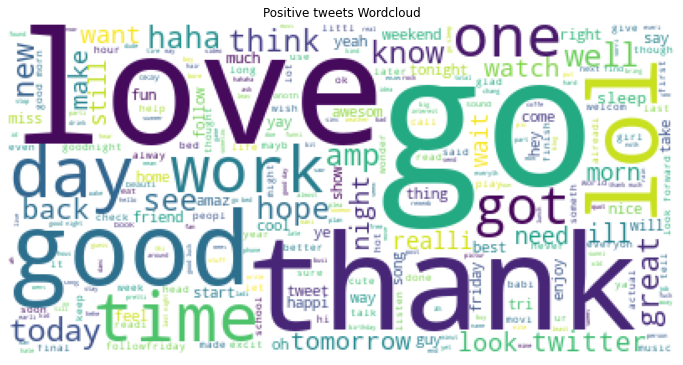

In [153]:
# "stop words", in simple terms it refers to the most common words in a language. 
# These are typically uninformative words, such as "the" or "and", for example, 
# that are thus removed during preprocessing in many Natural Language Processing (NLP) applications.
wordcloud = WordCloud(stopwords = STOPWORDS, background_color = "white", max_words = 1000).generate(positive_tweets)
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Positive tweets Wordcloud")

## NEGATIVE Tweets Word Cloud

Text(0.5, 1.0, 'Negative tweets Wordcloud')

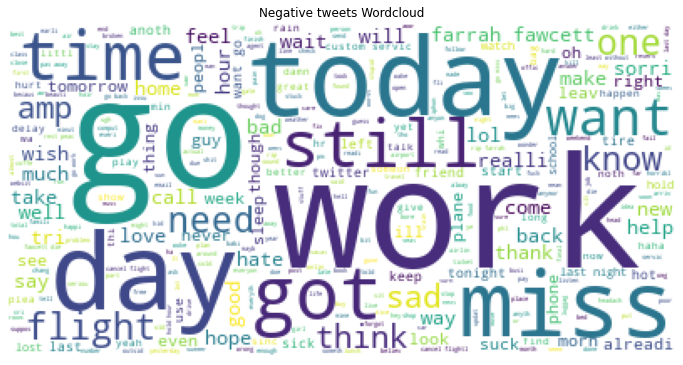

In [154]:
wordcloud = WordCloud(stopwords = STOPWORDS, background_color = "white", max_words = 1000).generate(negative_tweets)
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Negative tweets Wordcloud")

## NEUTRAL Tweets Word Cloud

Text(0.5, 1.0, 'Neutral tweets Wordcloud')

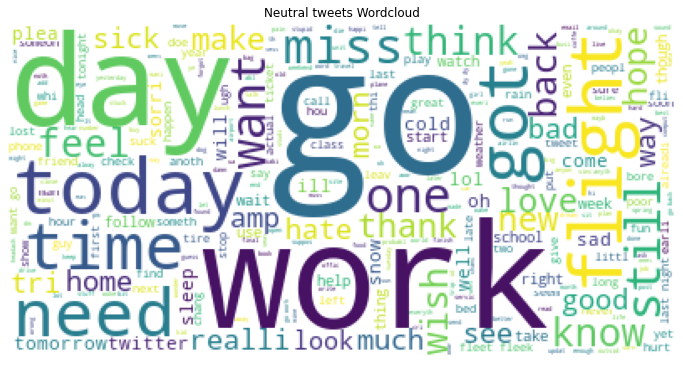

In [155]:
wordcloud = WordCloud(stopwords = STOPWORDS, background_color = "white", max_words = 1000).generate(neutral_tweets)
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Neutral tweets Wordcloud")

# Saving Step 2. Pre-Processing Data

In [156]:
#Save second round cleaned tweets_df 
cleaned_tweets_df.to_csv(OutputFolder+"/Step2_PreProcessing_Group33_Cleaned_Tweets.csv", index = False)
print(colored("DATA SAVED", "green"))

DATA SAVED


# ----DONE---- 